# Example: Polynomial Cureve Fitting

Observse a real-valued input variable $x$ $\rightarrow$ predict a real-valued target variable $t$ 

* $\textbf{x} \equiv (x_1, \cdots, x_i, \cdots, x_N)^T, \quad x_i \in [0, 1]$
* $\textbf{t} \equiv (t_1, \cdots, t_i, \cdots, t_N)^T, \quad t_i = \sin(2\pi x_i) + N(\mu, \sigma^2)$

In [1]:
import numpy as np
import matplotlib.pylab as plt

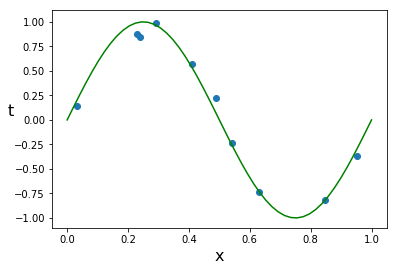

In [2]:
# making data
seed = 62
np.random.seed(seed)
N = 10
x = np.random.rand(N)
t = np.sin(2*np.pi*x) + np.random.randn(N) * 0.1
x_sin = np.linspace(0, 1)
t_sin = np.sin(2*np.pi*x_sin)
plt.plot(x_sin, t_sin, c='green')
plt.scatter(x, t)
plt.xlabel('x', fontsize=16)
plt.ylabel('t', rotation=0, fontsize=16)
plt.show()

* Goal: exploit this training set in order to make predictions of the value $\hat{t}$ of the target variable for some new value $\hat{x}$ of the input variable.
* Use some theories:
    * Probability theory: provides a framework for expressing such uncertainty in a precise and quantitative manner
    * Decision theory: allows us to exploit this probabilistic representation in order to make predictions that are optimal according to appropriate criteria
* For the moment, let's use polynomial function, where $M$ is the order of polynomial. $y(x, \mathbf{w})$ is a linear function of coefficients ($\mathbf{w}$)

$$y(x, \mathbf{w}) = w_0 + w_1 x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^{M} w_j x^j$$

In [3]:
def vandermonde_matrix(x, m):
    """we will introduce vandermonde_matrix, when we find solution of polynomial regression"""
    return np.array([x**i for i in range(m+1)]).T

In [4]:
def polynomial_function(x, w, m):
    assert w.size == m+1, "coefficients number must same as M"
    V = vandermonde_matrix(x, m)  # shape (M, x.size)
    return np.dot(V, w)

In [5]:
M = 3
w = np.random.randn(M+1)
t_hat = polynomial_function(x, w, M)
t_hat

array([-0.03857897, -0.47804452, -1.20709125, -0.36672413, -0.72446564,
       -0.22494955, -0.56442607, -0.16530768, -0.17606451, -1.50178608])

* The values of the coefficients will be determined by fitting the polynomial to the training data, this can be done by minimizing an error function, which measure the misfit between the function $y(x, \mathbf{w})$ and training data points.

$$E(\mathbf{w}) = \dfrac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2$$

In [6]:
def error_function(pred, target):    
    return (1/2)*((pred-target)**2).sum()

In [7]:
error_value = error_function(t_hat, t)
error_value

3.2744261083199575

* Because error function is quadratic function of $\mathbf{w}$, its derivatives with respect to the coefficients will be linear in the elements of $\mathbf{w}$, so the minimization of the error function has a unique solution.
* The remain problem is choosing the order $M$, this is called **model comparison or model selection**.
* Then how to choose optimal $M$?
    * use test data with 100 data points
    * evaluate the residual value of error

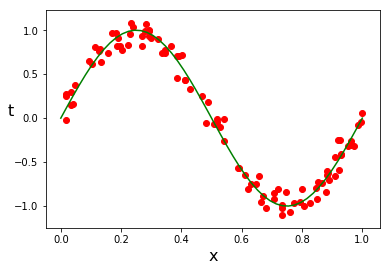

In [8]:
np.random.seed(seed)
N_test = 100 
x_test = np.random.rand(N_test)
t_test = np.sin(2*np.pi*x_test) + np.random.randn(N_test) * 0.1
plt.plot(x_sin, t_sin, c='green')
plt.scatter(x_test, t_test, c='red')
plt.xlabel('x', fontsize=16)
plt.ylabel('t', rotation=0, fontsize=16)
plt.show()

In [9]:
def root_mean_square_error(error, n_samples):
    return np.sqrt(2*error/n_samples)

In [10]:
# M=3
error = error_function(polynomial_function(x_test, w, M), t_test)
rms = root_mean_square_error(error, N_test)
rms

0.8096473129330312

### using normal equation to find soulution

First define $V$(size is $(N, M+1)$) matrix named **Vandermode matrix** which is looks like below. $M$ is degree of polynomial function.

$$V = \begin{bmatrix} 
1 & x_1 & x_1^2 & \cdots & x_1^M  \\
1 & x_2 & x_2^2 & \cdots & x_2^M \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_N & x_N^2 & \cdots & x_N^M
\end{bmatrix}$$

In [11]:
def vandermonde_matrix(x, m):
    """vandermonde matrix"""
    return np.array([x**i for i in range(m+1)]).T

In [12]:
M = 3
V = vandermonde_matrix(x, M)
print(V.round(3))

[[1.    0.034 0.001 0.   ]
 [1.    0.489 0.239 0.117]
 [1.    0.846 0.716 0.606]
 [1.    0.411 0.169 0.07 ]
 [1.    0.631 0.399 0.252]
 [1.    0.291 0.085 0.025]
 [1.    0.543 0.295 0.16 ]
 [1.    0.228 0.052 0.012]
 [1.    0.24  0.058 0.014]
 [1.    0.953 0.909 0.867]]


So, we can define polynomial as $y=V\cdot w$. Where $w$ is a column vector called **coefficients** , $w = [w_0, w_1, \cdots , w_M]^T$

$$y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} = 
\begin{bmatrix} w_0 + w_1x_1 + w_2x_1^2 + \cdots + w_Mx_1^M \\ w_0 + w_1x_2 + w_2x_2^2 + \cdots + w_Mx_2^M \\ \vdots \\ 
w_0 + w_1x_N + w_2x_N^2 + \cdots + w_Mx_N^M \end{bmatrix}$$

We already defined error function, $E(\mathbf{w}) = \dfrac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2 = \dfrac{1}{2} \Vert y - V \cdot w \Vert^2$. which is can solved by minimization, $\hat{w} = \underset{w}{\arg \min} E(w)$.

Define residual $r = y - V \cdot w$ then error function becomes $E(\mathbf{w}) =  \dfrac{1}{2} r^2 $ Because error function is quadratic function, the minimization of the error function has a unique solution.

Then we can get derivatives, and when it becomes to $0$, error function has minimum value.

$$\begin{aligned} \dfrac{\partial E}{\partial w} &= \begin{bmatrix} \dfrac{\partial E}{\partial w_0} \\ \dfrac{\partial E}{\partial w_1} \\ \vdots \\ \dfrac{\partial E}{\partial w_M} \end{bmatrix} \\
&= \begin{bmatrix} 
\dfrac{\partial E}{\partial r_1}\dfrac{\partial r_1}{\partial w_0} + \dfrac{\partial E}{\partial r_2}\dfrac{\partial r_2}{\partial w_0} + \cdots +\dfrac{\partial E}{\partial r_N}\dfrac{\partial r_N}{\partial w_0} \\ 
\dfrac{\partial E}{\partial r_1}\dfrac{\partial r_1}{\partial w_1} + \dfrac{\partial E}{\partial r_2}\dfrac{\partial r_2}{\partial w_1} + \cdots +\dfrac{\partial E}{\partial r_N}\dfrac{\partial r_N}{\partial w_1} \\
\vdots \\
\dfrac{\partial E}{\partial r_1}\dfrac{\partial r_1}{\partial w_M} + \dfrac{\partial E}{\partial r_2}\dfrac{\partial r_2}{\partial w_M} + \cdots +\dfrac{\partial E}{\partial r_N}\dfrac{\partial r_N}{\partial w_M} 
\end{bmatrix} \\
&= \begin{bmatrix} 
\dfrac{\partial r_1}{\partial w_0} & \dfrac{\partial r_2}{\partial w_0} & \cdots & \dfrac{\partial r_N}{\partial w_0} \\ 
\dfrac{\partial r_1}{\partial w_1} & \dfrac{\partial r_2}{\partial w_1} & \cdots & \dfrac{\partial r_N}{\partial w_1} \\ 
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial r_1}{\partial w_M} & \dfrac{\partial r_2}{\partial w_M} & \cdots & \dfrac{\partial r_N}{\partial w_M} 
\end{bmatrix} \cdot
\begin{bmatrix} \dfrac{\partial E}{\partial r_1} \\ \dfrac{\partial E}{\partial r_2} \\ \vdots \\ \dfrac{\partial E}{\partial r_N} \end{bmatrix} \\
&= \dfrac{\partial r}{\partial w} \cdot \dfrac{\partial E}{\partial r} \\
&= V^T \cdot (y - V\cdot w) = 0
\end{aligned}$$

So, we can find solution of coefficient $w$.

$$w = (V^TV)^{-1}V^Ty$$

In [13]:
def poly_solution(x, t, m):
    V = vandermonde_matrix(x, m)
    return np.linalg.inv(np.dot(V.T, V)).dot(V.T).dot(t)

In [14]:
print(f"Solution of coefficients are {poly_solution(x, t, M).round(3)}")

Solution of coefficients are [ -0.245  11.722 -33.194  21.798]


In [15]:
# confirm we are right
from numpy.polynomial import polynomial as P
P.polyfit(x, t, M).round(3)

array([ -0.245,  11.722, -33.194,  21.798])

Let's find optimal degree of polynomial now!

In [16]:
def get_rms_error(t_hat, t, n_sample, m):
    error = error_function(t_hat, t)
    rms = root_mean_square_error(error, n_sample)
    return rms

M=0 | rms_train: 0.6353 rms_test: 0.7221


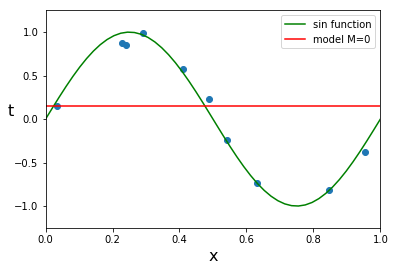

M=1 | rms_train: 0.4227 rms_test: 0.4508


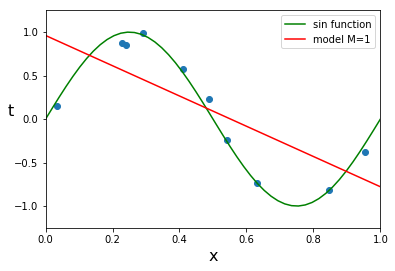

M=2 | rms_train: 0.4111 rms_test: 0.4643


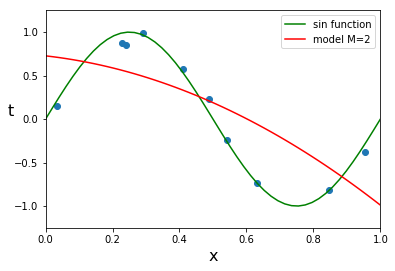

M=3 | rms_train: 0.0930 rms_test: 0.1238


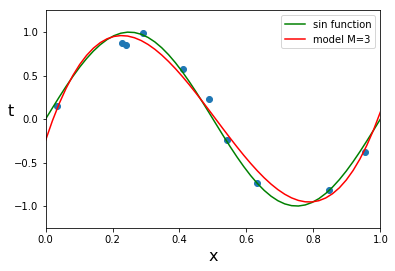

M=4 | rms_train: 0.0906 rms_test: 0.1258


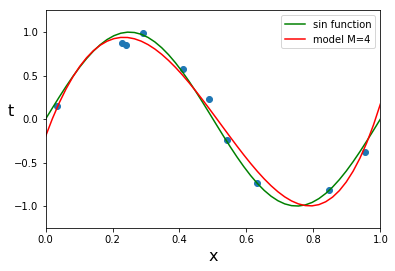

M=5 | rms_train: 0.0350 rms_test: 0.1512


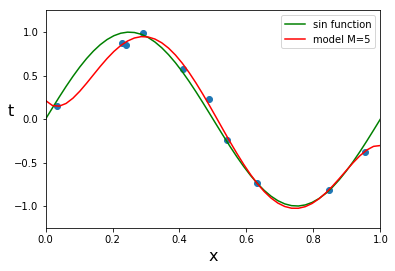

M=6 | rms_train: 0.0349 rms_test: 0.1493


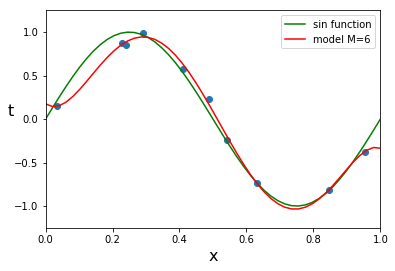

M=7 | rms_train: 0.0338 rms_test: 0.2356


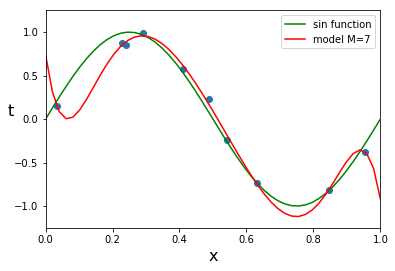

M=8 | rms_train: 0.0289 rms_test: 1.7615


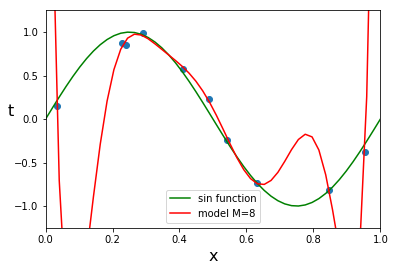

M=9 | rms_train: 0.0872 rms_test: 19.2855


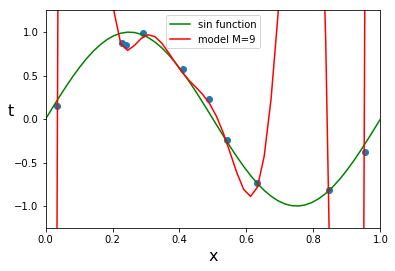

In [17]:
all_w = []
all_rms_train = []
all_rms_test = []
lr = 0.1

for m in range(10):
    optimal_w = poly_solution(x, t, m)
    t_hat = polynomial_function(x, optimal_w, m)
    t_hat_test = polynomial_function(x_test, optimal_w, m)
    
    rms_train = get_rms_error(t_hat, t, N, m)  # N=10
    rms_test = get_rms_error(t_hat_test, t_test, N_test, m)  # N_test = 100
    print(f"M={m} | rms_train: {rms_train:.4f} rms_test: {rms_test:.4f}")
    
    plt.plot(x_sin, t_sin, c="green", label="sin function")
    plt.plot(x_sin, polynomial_function(x_sin, optimal_w, m), c="red", label=f"model M={m}")
    plt.scatter(x, t)
    plt.xlim((0, 1))
    plt.ylim((-1.25, 1.25))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('t', rotation=0, fontsize=16)
    plt.legend()
    plt.show()
    
    all_w.append(optimal_w)
    all_rms_train.append(rms_train)
    all_rms_test.append(rms_test)

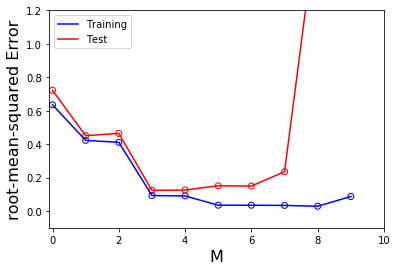

In [18]:
plt.scatter(np.arange(10), all_rms_train, facecolors='none', edgecolors='b')
plt.plot(np.arange(10), all_rms_train, c='b', label='Training')
plt.scatter(np.arange(len(all_rms_test)), all_rms_test, facecolors='none', edgecolors='r')
plt.plot(np.arange(len(all_rms_test)), all_rms_test, c='r', label='Test')
plt.legend()
plt.xlim((-0.1, 10))
plt.ylim((-0.1, 1.2))
plt.ylabel("root-mean-squared Error", fontsize=16)
plt.xlabel("M", fontsize=16)
plt.show()

### Using gradient descent to find solution

In [19]:
def polynomial_function_prime(x, m):
    """dy/dw, same as vandermonde_matrix(x, m)"""
    return np.array([x**i for i in range(m+1)]).T  # shape (N, M)

In [20]:
def get_gradient(pred, t, x, m):
    """
    not good to use gradient descent to optimize polynomial
    https://stats.stackexchange.com/questions/350130/why-is-gradient-descent-so-bad-at-optimizing-polynomial-regression
    """
    return np.dot((pred-t), polynomial_function_prime(x, m))

In [21]:
dE = get_gradient(t_hat, t, x, M)
dE

array([-0.72471102, -0.44077956, -0.33763231, -0.28271485])

In [22]:
def train_phase(x, t, w, m, step=10, lr=0.1):
    """use gradient descent update"""
    errors = []
    for _ in range(step):
        t_hat = polynomial_function(x, w, m)
        error_value = error_function(t_hat, t)
        w -= lr * get_gradient(t_hat, t, x, m)
        errors.append(error_value)
    return w, errors

In [23]:
all_w = []
all_errors = []
for lr in [0.1, 0.01, 0.001, 0.0001]:
    np.random.seed(seed)
    w = np.random.normal(5, 10, size=(M+1))
    w, error = train_phase(x, t, w, M, step=100, lr=lr)
    all_w.append(w)
    all_errors.append(error)

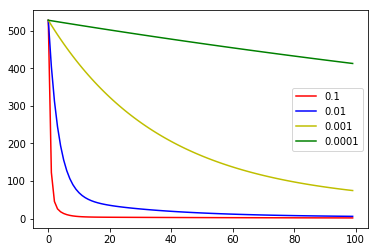

In [24]:
# to find optimal step for gradient descent
steps = np.arange(100)
for e, c, lr in zip(all_errors, ['r', 'b', 'y', 'g'], [0.1, 0.01, 0.001, 0.0001]):
    if e[-1] > 30000:
        continue
    plt.plot(steps, e, c=c, label=f"{lr}")
    plt.legend()
plt.show()

In [25]:
def get_rms_error(t_hat, t, n_sample, m):
    error = error_function(t_hat, t)
    rms = root_mean_square_error(error, n_sample)
    return rms

Train Error for M=0 is 20.3142 | rms_train: 0.6353 rms_test: 0.7221


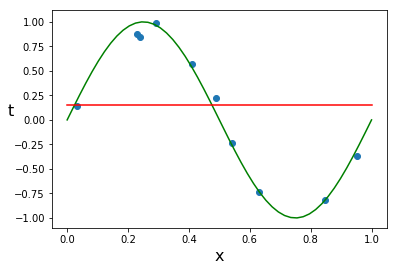

Train Error for M=1 is 13.8861 | rms_train: 0.4677 rms_test: 0.5137


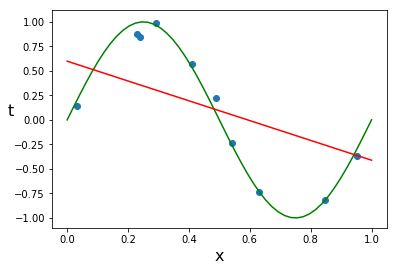

Train Error for M=2 is 12.0099 | rms_train: 0.4238 rms_test: 0.4704


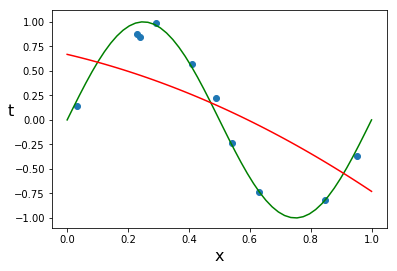

Train Error for M=3 is 14.1941 | rms_train: 0.4197 rms_test: 0.4560


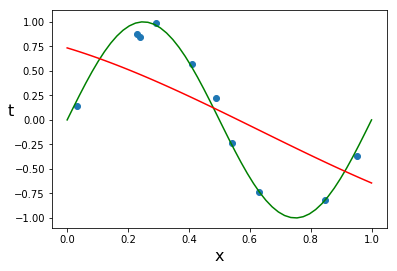

Train Error for M=4 is 12.5921 | rms_train: 0.4501 rms_test: 0.5166


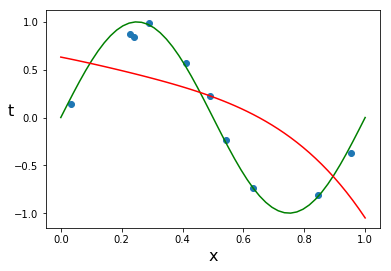

Train Error for M=5 is 12.1798 | rms_train: 0.4264 rms_test: 0.4787


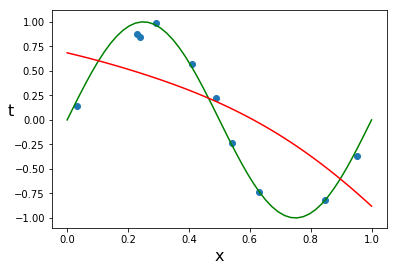

Train Error for M=6 is 14.2764 | rms_train: 0.4775 rms_test: 0.5581


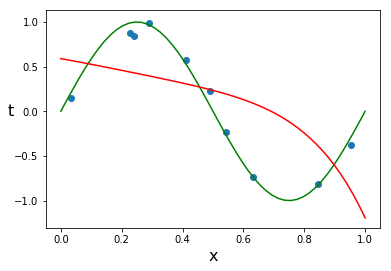

Train Error for M=7 is 13.6645 | rms_train: 0.4636 rms_test: 0.5360


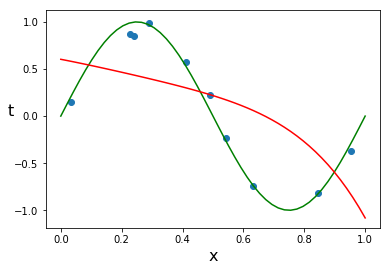

Train Error for M=8 is 15.3040 | rms_train: 0.4790 rms_test: 0.5598


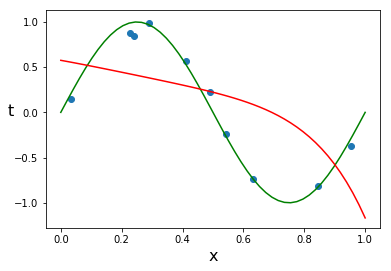

Train Error for M=9 is 11.8843 | rms_train: 0.4258 rms_test: 0.4717


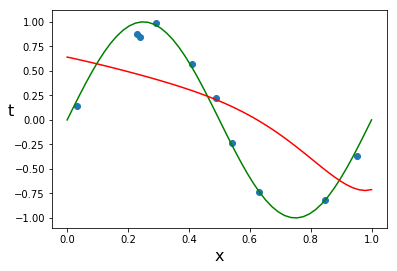

In [26]:
all_w = []
all_rms_train = []
all_rms_test = []
lr = 0.1

for m in range(10):
    np.random.seed(seed)
    w_raw = np.random.randn(m+1)
    optimal_w, train_error = train_phase(x, t, w_raw, m, step=10, lr=lr)
    
    t_hat = polynomial_function(x, optimal_w, m)
    t_hat_test = polynomial_function(x_test, optimal_w, m)
    
    rms_train = get_rms_error(t_hat, t, N, m)  # N=10
    rms_test = get_rms_error(t_hat_test, t_test, N_test, m)  # N_test = 100
    print(f"Train Error for M={m} is {np.sum(train_error):.4f} | rms_train: {rms_train:.4f} rms_test: {rms_test:.4f}")
    
    plt.plot(x_sin, t_sin, c="green")
    plt.plot(x_sin, polynomial_function(x_sin, optimal_w, m), c="red")
    plt.scatter(x, t)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('t', rotation=0, fontsize=16)
    plt.show()
    
    all_w.append(optimal_w)
    all_rms_train.append(rms_train)
    all_rms_test.append(rms_test)

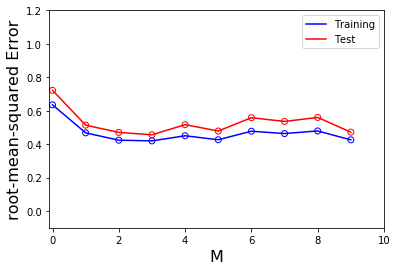

In [27]:
plt.scatter(np.arange(10), all_rms_train, facecolors='none', edgecolors='b')
plt.plot(np.arange(10), all_rms_train, c='b', label='Training')
plt.scatter(np.arange(len(all_rms_test)), all_rms_test, facecolors='none', edgecolors='r')
plt.plot(np.arange(len(all_rms_test)), all_rms_test, c='r', label='Test')
plt.legend()
plt.xlim((-0.1, 10))
plt.ylim((-0.1, 1.2))
plt.ylabel("root-mean-squared Error", fontsize=16)
plt.xlabel("M", fontsize=16)
plt.show()